# Mini-projet : ANALYSE COMPARATIVE D’ALGORITHMES

#Etudiant : Brice CHABI

# Description :
Dans l'industrie du commerce (épiceries, etc), la segmentation des différents types de clientèle est un grand atout pour mieux mettre en place les stratégies de marketing. C'est la raison pour laquelle ce projet vise à catégoriser les différents types de clients dans un supermarché ainsi que leurs dépenses habituelles.

#Dataset utilisé : Mall Customer Segmentation Data (https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)


Importation des librairies et chargement des données

In [99]:
#Importation des librairies et chargement des données
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster



Chargement et exploration des données

In [100]:
# Chargement et exploration des données
df = pd.read_csv('Mall_Customers.csv')
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

PRETRAITEMENT DES DONNEES


In [101]:
# PRETRAITEMENT DES DONNEES
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])


Choix du nombre de clusters (K) pour K-Means

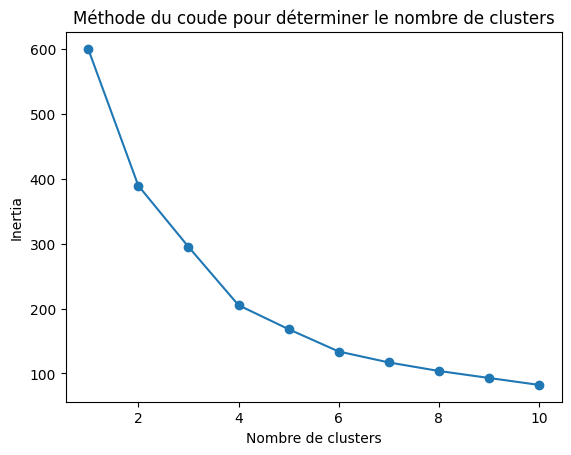

In [102]:
# Choix du nombre de clusters (K) pour K-Means
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Méthode du coude pour déterminer le nombre de clusters')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertia')
plt.show()


Application de l'algorithme K-Means

In [103]:
# Application de l'algorithme K-Means
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)  # Supposons qu'on ait choisi 5 clusters
df['Cluster'] = kmeans.fit_predict(X_scaled)


Visualisation des clusters

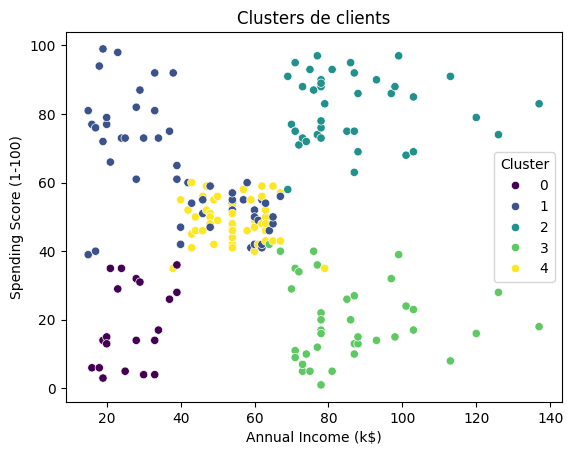

In [104]:
# Visualisation des clusters
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters de clients')
plt.show()


Interprétation des clusters

In [105]:
# Interprétation des clusters
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)


         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         24.100000  0.600000  46.250000           26.750000   
1         55.648148  0.592593  25.185185           41.092593   
2        161.025000  0.550000  32.875000           86.100000   
3        159.743590  0.487179  39.871795           86.102564   
4         83.872340  0.574468  55.638298           54.382979   

         Spending Score (1-100)  
Cluster                          
0                     18.350000  
1                     62.240741  
2                     81.525000  
3                     19.358974  
4                     48.851064  


Comparaison avec le clustering hiérarchique

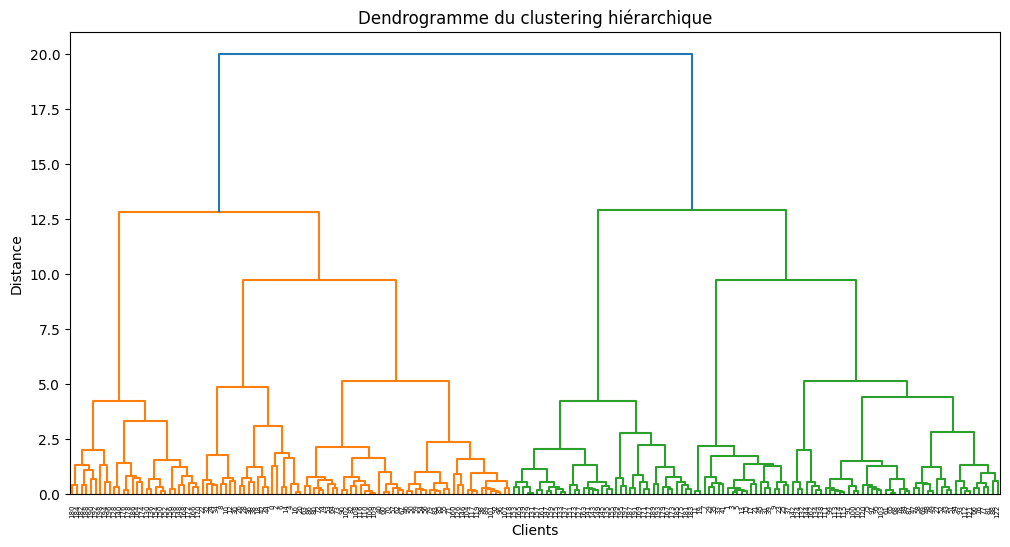

In [106]:
# Clustering hiérarchique agglomératif
linked = linkage(X_scaled, method='ward')  # Méthode de Ward pour minimiser la variance dans les clusters

# Dendrogramme
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top')
plt.title('Dendrogramme du clustering hiérarchique')
plt.xlabel('Clients')
plt.ylabel('Distance')
plt.show()

# Découpage du dendrogramme pour obtenir les clusters (par exemple, 5 clusters)
df['Cluster_Hierarchical'] = fcluster(linked, t=5, criterion='maxclust')


Evaluation

In [107]:
 # Évaluation et comparaison des clusters
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score

# Coefficient de silhouette
silhouette_avg = silhouette_score(X_scaled, df['Cluster'])
print(f"Coefficient de silhouette (K-Means) : {silhouette_avg}")

# ARI et NMI
ari = adjusted_rand_score(df['Cluster'], df['Cluster_Hierarchical'])
nmi = normalized_mutual_info_score(df['Cluster'], df['Cluster_Hierarchical'])

print(f"Adjusted Rand Index (ARI) : {ari}")
print(f"Normalized Mutual Information (NMI) : {nmi}")

Coefficient de silhouette (K-Means) : 0.41664341513732767
Adjusted Rand Index (ARI) : 0.7730902306340448
Normalized Mutual Information (NMI) : 0.8131811084562843


Interpretation des clusters et comparaison des résultats

In [108]:
# Interprétation des clusters
cluster_summary = df.groupby('Cluster').mean()
print("\nInterprétation des clusters K-Means :")
print(cluster_summary)
print("\nAnalyse des résultats par cluster :")
print("Cluster 0 : Clients avec un revenu faible et un score de dépenses faible (Prudents).")
print("Cluster 1 : Clients avec un revenu moyen et un score de dépenses élevé (Dépensiers modérés).")
print("Cluster 2 : Clients avec un revenu élevé et un score de dépenses élevé (Grands dépensiers).")
print("Cluster 3 : Clients avec un revenu élevé et un score de dépenses faible (Économes).")
print("Cluster 4 : Clients avec un revenu moyen et un score de dépenses moyen (Standards).")

# Comparaison des résultats
print("\nComparaison des résultats entre K-Means et le clustering hiérarchique:")
print("ARI (Adjusted Rand Index) :", ari)
print("NMI (Normalized Mutual Information) :", nmi)

print("\nAnalyse de la comparaison :")
print("l'ARI et le NMI sont relativement élevés, ce qui suggère que les deux méthodes de clustering donnent des résultats similaires.")




Interprétation des clusters K-Means :
         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         24.100000  0.600000  46.250000           26.750000   
1         55.648148  0.592593  25.185185           41.092593   
2        161.025000  0.550000  32.875000           86.100000   
3        159.743590  0.487179  39.871795           86.102564   
4         83.872340  0.574468  55.638298           54.382979   

         Spending Score (1-100)  Cluster_Hierarchical  
Cluster                                                
0                     18.350000              2.000000  
1                     62.240741              4.888889  
2                     81.525000              4.025000  
3                     19.358974              2.025641  
4                     48.851064              3.170213  

Analyse des résultats par cluster :
Cluster 0 : Clients avec un revenu faible et un score de dépenses faible (Prudents)

Conclusion

In [109]:
# Conclusion
print("En résumé, K-Means est un outil efficace pour la segmentation de clientèle dans notre contexte.")

En résumé, K-Means est un outil efficace pour la segmentation de clientèle dans notre contexte.
